## Supplement 4: Classification

In [34]:
%matplotlib inline
import numpy as np
import pandas as pd
np.seterr(over='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

### 4.3 Programming Task: Song popularity prediction using Logistic regression
The datasets __train-songs.csv__ and __test-songs.csv__ contain audio properties of various tracks collected from the music streaming site Spotify.


The goal of the task is to train a logistic regression classifier that predicts if
a given track is popular or not.
The dataset consists of 9 columns.
The first 8 columns contain various audio properties
which are provided as input features to the model.
The last column contains the class labels given by 0(not popular) and 1(popular).

i\. Implement the loss function and its gradient for the logistic regression model.


In [35]:
train_song = pd.read_csv('/content/train-songs.csv')
def sigmoid(x):
  return 1/(1+np.exp(-x))

def loss(y,y_):
  epsilon = 1e-15
  y_ = np.clip(y_, epsilon, 1 - epsilon)
  return np.mean(-y*np.log(y_) - (1-y)*np.log(1-y_))

def gradient(y,y_):
  return y_ - y

   ii\. Using the gradient descent algorithm, train the logistic regression model.
You may reuse/modify the gradient descent algorithm from the previous supplement.




In [36]:
def train(x,y,epoch,lr):
  ls = []
  x = (x-np.mean(x))/np.std(x)
  w = np.zeros(x.shape[1]).reshape(-1,1)
  b = 0
  for i in range(epoch):
    y_ = sigmoid(np.dot(x,w)+b)
    l = loss(y,y_)
    grad = gradient(y,y_)
    w=w-lr*np.dot(x.T,grad)
    b = b-lr*np.sum(grad)
    if i%100 == 0:
      ls.append(l)
  return w,b,ls

x=np.array(train_song.iloc[:,:-1])
y=np.array(train_song.iloc[:,-1:])
w,b,l=train(x,y,1000,0.1)
print(l)

[0.6931471805599453, 16.550368965084427, 16.026151143573163, 15.645318386980597, 15.06817310067236, 14.653820181528092, 13.677017911519739, 12.909979023201942, 12.396777623127978, 12.048400172238058]


iii\. Using model predictions on __test-songs.csv__, build the confusion
matrix and subsequently calculate the precision, recall, and F1-score for a threshold of 0.4.


In [37]:
test_song = pd.read_csv('/content/test-songs.csv')
x=np.array(test_song.iloc[:,:-1])
x = (x-np.mean(x))/np.std(x)
y=np.array(test_song.iloc[:,-1:]).astype(int)
threshold = 0.4
pred = sigmoid(np.dot(x,w)+b)
y_ = (pred>threshold).astype(int)

from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score
cm = confusion_matrix(y,y_)
tn, fp, fn, tp = cm.ravel()
precision = precision_score(y,y_)
recall = recall_score(y,y_)
f1 = f1_score(y,y_)
print("precision: ", precision, " recall: ",recall, " f1 score: ",f1)

precision:  0.8894348894348895  recall:  0.362  f1 score:  0.5145700071073206


iv\. Plot the ROC curve for the model and calculate the AUC metric of your model.


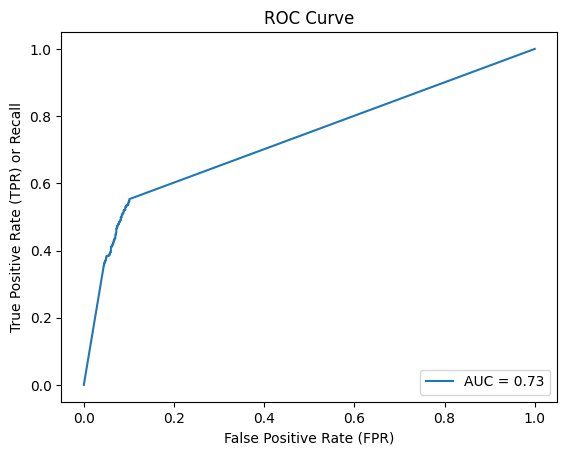

In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

v\. Consider the simpler models given below.The input $\mathbf{x}$ in these models takes only 4 input features from the given dataset.

- Model A $~~~~~~~~~~~$   $\mathbf{x}$ = $[$ danceability, key, valence, tempo $]^\top$
- Model B $~~~~~~~~~~~$  $\mathbf{x}$ = $[$ danceability, loudness, acousticness, instrumentalness $]^\top$
- Model C $~~~~~~~~~~~$ $\mathbf{x}$ = $[$ key, liveness, valence, tempo $]^\top$

Train these models using your logistic regression implementation and determine the best performing model using the AUC metric.

In [40]:
from sklearn.metrics import roc_curve, auc
x_a = np.array(train_song[['danceability', 'key', 'valence', 'tempo']])
x_b = np.array(train_song[['danceability', 'loudness', 'acousticness', 'instrumentalness']])
x_c = np.array(train_song[['key', 'liveness', 'valence', 'tempo']])
y=np.array(train_song.iloc[:,-1:])

def auc_compare(x,y):
  w,b,l=train(x,y,1000,0.1)
  pred = sigmoid(np.dot(x,w)+b)
  fpr, tpr, thresholds = roc_curve(y, pred)
  roc_auc = auc(fpr, tpr)
  return roc_auc

a = auc_compare(x_a,y)
print("Model_A: ",a)
a = auc_compare(x_b,y)
print("Model_B: ",a)
a = auc_compare(x_c,y)
print("Model_C: ",a)

Model_A:  0.50015
Model_B:  0.691491725
Model_C:  0.5001500400000001


Best performing model as per AUC metric is B